In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import Counter

In [2]:
df_train = pd.read_csv('../ventilator-pressure-prediction-data/train.csv')

In [3]:
df_train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [4]:
df_train.groupby('breath_id').agg(list).reset_index()

,breath_id,id,R,C,time_step,u_in,u_out,pressure
0,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[0.0, 0.0336523056030273, 0.067514419555664, 0...","[0.0833340056346443, 18.38304147263472, 22.509...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.837491705069121, 5.907793850520346, 7.87625..."
1,2,"[81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 9...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[0.0, 0.0339975357055664, 0.0681509971618652, ...","[12.184337517135212, 13.980205443281347, 12.57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.048398141422782, 7.524743195898315, 9.28229..."
2,3,"[161, 162, 163, 164, 165, 166, 167, 168, 169, ...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[0.0, 0.03196382522583, 0.0639522075653076, 0....","[0.0, 7.18724187099842, 13.338780645925038, 17...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.064168105105749, 5.064168105105749, 6.75141..."
3,4,"[241, 242, 243, 244, 245, 246, 247, 248, 249, ...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[0.0, 0.0318536758422851, 0.0637614727020263, ...","[0.0, 1.2625385852839184, 4.001352088243387, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.259304577776412, 5.767189559617911, 6.54051..."
4,5,"[321, 322, 323, 324, 325, 326, 327, 328, 329, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[0.0, 0.0339670181274414, 0.0687971115112304, ...","[21.424374842054064, 28.504653017718358, 29.35...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.329606723227637, 7.384138904995879, 8.36836..."
...,...,...,...,...,...,...,...,...
75445,125740,"[6035601, 6035602, 6035603, 6035604, 6035605, ...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[0.0, 0.0348799228668212, 0.0689036846160888, ...","[0.0, 0.0, 0.6739133329743916, 1.7007626873808...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.470211014130073, 5.837491705069121, 6.25930..."
75446,125742,"[6035681, 6035682, 6035683, 6035684, 6035685, ...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, 0.0338180065155029, 0.0677299499511718, ...","[85.63023054349601, 100.0, 81.56681300270868, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.329606723227637, 11.391361195715188, 20.952..."
75447,125743,"[6035761, 6035762, 6035763, 6035764, 6035765, ...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[0.0, 0.0336830615997314, 0.0673832893371582, ...","[0.0, 0.0, 0.0, 0.9501772243146738, 3.25671236...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.259304577776412, 5.907793850520346, 6.04839..."
75448,125745,"[6035841, 6035842, 6035843, 6035844, 6035845, ...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 5...","[0.0, 0.031679630279541, 0.0633506774902343, 0...","[15.564236227541224, 23.58883636738182, 20.298...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.962326032288589, 8.790181814020203, 12.4458..."


In [5]:
import torch
from torch.utils.data import Dataset

class VentilatorDataset(Dataset):
    '''
    Prepares Dataframe for Machine-Learning
    '''
    def __init__(self, df):
        if "pressure" not in df.columns:
            df['pressure'] = 0

        # makes lists of features per column for each breath
        self.df = df.groupby('breath_id').agg(list).reset_index()
        
        self.prepare_data()
                
    def __len__(self):
        return self.df.shape[0]
    
    def prepare_data(self):
        self.pressures = np.array(self.df['pressure'].values.tolist())
        
        rs = np.array(self.df['R'].values.tolist())
        cs = np.array(self.df['C'].values.tolist())
        u_ins = np.array(self.df['u_in'].values.tolist())
        
        self.u_outs = np.array(self.df['u_out'].values.tolist())
        
        self.inputs = np.concatenate([
            # makes nx1 - Matrix instaed of a n - vektor
            rs[:, None], 
            cs[:, None], 
            u_ins[:, None], 
            np.cumsum(u_ins, 1)[:, None],
            self.u_outs[:, None]
        ], 1).transpose(0, 2, 1)

    def __getitem__(self, idx):
        data = {
            "input": torch.tensor(self.inputs[idx], dtype=torch.float),
            "u_out": torch.tensor(self.u_outs[idx], dtype=torch.float),
            "p": torch.tensor(self.pressures[idx], dtype=torch.float),
        }
        
        return data

In [6]:
dataset = VentilatorDataset(df_train)
dataset[0]

{'input': tensor([[2.0000e+01, 5.0000e+01, 8.3334e-02, 8.3334e-02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 1.8383e+01, 1.8466e+01, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.2509e+01, 4.0976e+01, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.2809e+01, 6.3784e+01, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.5356e+01, 8.9140e+01, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.7260e+01, 1.1640e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.7127e+01, 1.4353e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.6808e+01, 1.7034e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.7865e+01, 1.9820e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.8313e+01, 2.2651e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.6867e+01, 2.5338e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.6763e+01, 2.8014e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.7993e+01, 3.0814e+02, 0.0000e+00],
         [2.0000e+01, 5.0000e+01, 2.6790e+01, 3.3493e+02, 0.0000e+00

Lets make the Model

In [7]:
import torch.nn as nn


class RNNModel(nn.Module):
    '''
    Defines the Model that will be used. In this case a LSTM NN.

    This class is based on the PyTorch LSTM Tutorial.
    '''
    def __init__(
        self,
        input_dim=4,
        lstm_dim=256,
        dense_dim=256,
        logit_dim=256,
        num_classes=1,
    ):
        super().__init__()

        # multilayer perceprton model (feedforward)
        self.mlp = nn.Sequential(
            nn.Linear(input_dim, dense_dim // 2),
            nn.ReLU(),
            nn.Linear(dense_dim // 2, dense_dim),
            nn.ReLU(),
        )

        self.lstm = nn.LSTM(dense_dim, lstm_dim, batch_first=True, bidirectional=True)

        self.logits = nn.Sequential(
            nn.Linear(lstm_dim * 2, logit_dim),
            nn.ReLU(),
            nn.Linear(logit_dim, num_classes),
        )

    def forward(self, x):
        features = self.mlp(x)
        features, _ = self.lstm(features)
        pred = self.logits(features)
        return pred

Eine kluge Variante die Metrik der Challenge zu implementieren und direkt darauf zu optimieren

In [8]:
def compute_metric(df, preds):
    """
    Defines the Score/Metrik for the specific problem.
    """
    
    # u_out = 1 is not used
    y = np.array(df['pressure'].values.tolist())
    w = 1 - np.array(df['u_out'].values.tolist())
    
    assert y.shape == preds.shape and w.shape == y.shape, (y.shape, preds.shape, w.shape)
    
    mae = w * np.abs(y - preds)
    mae = mae.sum() / w.sum()
    
    return mae


class VentilatorLoss(nn.Module):
    """
    Directly optimizes the competition metric/score.
    """
    def __call__(self, preds, y, u_out):
        w = 1 - u_out
        mae = w * (y - preds).abs()
        mae = mae.sum(-1) / w.sum(-1)

        return mae

In [9]:
import gc
import time
import torch
import numpy as np
from torch.utils.data import DataLoader
from transformers import get_linear_schedule_with_warmup


def fit(
    model : RNNModel,
    train_dataset : VentilatorDataset,
    val_dataset : VentilatorDataset,
    loss_name="L1Loss",
    optimizer="Adam",
    epochs=50,
    batch_size=32,
    val_bs=32,
    warmup_prop=0.1,
    lr=1e-3,
    num_classes=1,
    verbose=1,
    first_epoch_eval=0,
) -> np.ndarray:
    '''
    Trains and evaluates the model.

    Args:
        model: Model to predict with.
        train_dataset: Dataset to predict on.
        val_dataset: Dataset to validate.
        loss_name: Identifys the Loss-Function. Defaults on "L1Loss".
        optimizer: Identifys the Optimizer-Function. Defaults on "Adam".
        batch_size: Batch size. Defaults to 32.
        val_bs: Validation batch size. Defaults on 32. 
        warmup_prop: Parameter for the scheduler. Defaults on 0.1.
        lr: Decimal places for parameters. Defaults ob 1e-3.
        num_classes: Defaulst on 1.
        verbose: every verbose intervall you get an evaluation printed. Defaults on 1.
        first_epoch_eval: Epochnumber for the first evaluation. Defaults on 0.
         

    Returns:
        numpy array [len(dataset) x num_classes]: Predictions.
    '''
    avg_val_loss = 0.

    # Optimizer
    optimizer = getattr(torch.optim, optimizer)(model.parameters(), lr=lr)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        drop_last=True,
        pin_memory=True,
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=val_bs,
        shuffle=False,
        pin_memory=True,
    )

    # own lossfunction for challenge
    loss_fct = VentilatorLoss()

    # Scheduler, to reduce learning-rate in epochs
    num_warmup_steps = int(warmup_prop * epochs * len(train_loader))
    num_training_steps = int(epochs * len(train_loader))
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps, num_training_steps
    )

    for epoch in range(epochs):
        model.train()

        # to clear bevor each epoch
        model.zero_grad()
        start_time = time.time()

        avg_loss = 0
        for data in train_loader:
            pred = model(data['input']).squeeze(-1)

            loss = loss_fct(
                pred,
                data['p'],
                data['u_out'],
            ).mean()
            loss.backward()
            avg_loss += loss.item() / len(train_loader)

            optimizer.step()
            scheduler.step()

            for param in model.parameters():
                param.grad = None

        model.eval()
        mae, avg_val_loss = 0, 0
        preds = []

        # does not need to be trained
        with torch.no_grad():
            for data in val_loader:
                pred = model(data['input']).squeeze(-1)

                loss = loss_fct(
                    pred.detach(), 
                    data['p'],
                    data['u_out'],
                ).mean()
                avg_val_loss += loss.item() / len(val_loader)

                preds.append(pred.detach().cpu().numpy())
        
        preds = np.concatenate(preds, 0)
        mae = compute_metric(val_dataset.df, preds)

        elapsed_time = time.time() - start_time
        if (epoch + 1) % verbose == 0:
            elapsed_time = elapsed_time * verbose
            lr = scheduler.get_last_lr()[0]
            print(
                f"Epoch {epoch + 1:02d}/{epochs:02d} \t lr={lr:.1e}\t t={elapsed_time:.0f}s \t"
                f"loss={avg_loss:.3f}",
                end="\t",
            )

            if (epoch + 1 >= first_epoch_eval) or (epoch + 1 == epochs):
                print(f"val_loss={avg_val_loss:.3f}\tmae={mae:.3f}")
            else:
                print("")

    del (val_loader, train_loader, loss, data, pred)
    gc.collect()
    torch.cuda.empty_cache()

    return preds

In [10]:
def predict(
    model : RNNModel,
    dataset : VentilatorDataset,
    batch_size=64,
) -> np.ndarray:
    """
    Evaluates the model. PyTorch prediction function.

    Args:
        model: Model to predict with.
        dataset: Dataset to predict on.
        batch_size: Batch size. Defaults to 64.

    Returns:
        numpy array [len(dataset) x num_classes]: Predictions.
    """
    model.eval()

    loader = DataLoader(
        dataset, batch_size=batch_size, shuffle=False
    )
    
    preds = []
    with torch.no_grad():
        for data in loader:
            pred = model(data['input']).squeeze(-1)
            preds.append(pred.detach().cpu().numpy())
    
    preds = np.concatenate(preds, 0)
    return preds

In [11]:
def train(config, df_train : pd.DataFrame, df_val : pd.DataFrame, df_test : pd.DataFrame, fold : int) -> np.ndarray:
    """
    Trains and validate a model.

    Args:
        config (Config): Parameters.
        df_train: Training metadata.
        df_val: Validation metadata.
        df_test: Test metadata.
        fold: Selected fold.

    Returns:
        np array: Study validation predictions.
    """

    #seed_everything(config.seed)

    model = RNNModel(
        input_dim=config.input_dim,
        lstm_dim=config.lstm_dim,
        dense_dim=config.dense_dim,
        logit_dim=config.logit_dim,
        num_classes=config.num_classes,
    )
    model.zero_grad()

    train_dataset = VentilatorDataset(df_train)
    val_dataset = VentilatorDataset(df_val)
    test_dataset = VentilatorDataset(df_test)

    #n_parameters = count_parameters(model)

    print(f"    -> {len(train_dataset)} training breathes")
    print(f"    -> {len(val_dataset)} validation breathes")
    #print(f"    -> {n_parameters} trainable parameters\n")

    pred_val = fit(
        model,
        train_dataset,
        val_dataset,
        optimizer=config.optimizer,
        epochs=config.epochs,
        batch_size=config.batch_size,
        val_bs=config.val_bs,
        lr=config.lr,
        warmup_prop=config.warmup_prop,
        verbose=config.verbose,
        first_epoch_eval=config.first_epoch_eval,
        #device=config.device,
    )
    
    pred_test = predict(
        model, 
        test_dataset, 
        batch_size=config.val_bs, 
    )

    del (model, train_dataset, val_dataset, test_dataset)
    gc.collect()

    return pred_val, pred_test

k-fold cross validation

In [12]:
from sklearn.model_selection import GroupKFold

def k_fold(config, df : pd.DataFrame, df_test : pd.DataFrame) -> np.ndarray:
    """
    Performs a patient grouped k-fold cross validation.

    Args:
        config (Config): Parameters.
        df: Dataframe metadata.
        df_test: Test metadata.

    Returns:
        np array: Study validation predictions.
    """

    pred_oof = np.zeros(len(df))
    preds_test = []
    
    gkf = GroupKFold(n_splits=config.k)
    splits = list(gkf.split(X=df, y=df, groups=df["breath_id"]))

    for i, (train_idx, val_idx) in enumerate(splits):
        if i in config.selected_folds:
            print(f"\n-------------   Fold {i + 1} / {config.k}  -------------\n")

            df_train = df.iloc[train_idx].copy().reset_index(drop=True)
            df_val = df.iloc[val_idx].copy().reset_index(drop=True)

            pred_val, pred_test = train(config, df_train, df_val, df_test, i)
            
            pred_oof[val_idx] = pred_val.flatten()
            preds_test.append(pred_test.flatten())

    print(f'\n -> CV MAE : {compute_metric(df, pred_oof) :.3f}')

    return pred_oof, np.mean(preds_test, 0)

Let's start the fun.

In [13]:
class Config:
    """
    Defines parameters used for training
    """
    # General
    seed = 42
    verbose = 1
    device = "cuda" if torch.cuda.is_available() else "cpu"
    #save_weights = True

    # k-fold
    k = 5
    selected_folds = [0, 1, 2, 3, 4]
    # override
    k = 3
    selected_folds = [0, 1, 2]
    
    # Model
    selected_model = 'rnn'
    input_dim = 5

    dense_dim = 512
    lstm_dim = 512
    logit_dim = 512
    num_classes = 1

    # Training
    loss = "L1Loss"  # not used
    optimizer = "Adam"
    batch_size = 128
    epochs = 50
    # override
    epochs = 30

    lr = 1e-3
    warmup_prop = 0

    val_bs = 256
    first_epoch_eval = 0

In [14]:
df_test = pd.read_csv('../ventilator-pressure-prediction-data/test.csv')

In [15]:
pred_oof, pred_test = k_fold(
    Config, 
    df_train,
    df_test,
)


-------------   Fold 1 / 3  -------------

    -> 50300 training breathes
    -> 25150 validation breathes
Epoch 01/30 	 lr=9.7e-04	 t=365s 	loss=2.710	val_loss=2.223	mae=2.232
Epoch 02/30 	 lr=9.3e-04	 t=364s 	loss=1.663	val_loss=1.454	mae=1.460
Epoch 03/30 	 lr=9.0e-04	 t=364s 	loss=1.420	val_loss=1.312	mae=1.317
Epoch 04/30 	 lr=8.7e-04	 t=370s 	loss=1.260	val_loss=1.212	mae=1.218
Epoch 05/30 	 lr=8.3e-04	 t=368s 	loss=1.185	val_loss=1.198	mae=1.202
Epoch 06/30 	 lr=8.0e-04	 t=362s 	loss=1.129	val_loss=1.072	mae=1.077
Epoch 07/30 	 lr=7.7e-04	 t=357s 	loss=1.079	val_loss=1.151	mae=1.158
Epoch 08/30 	 lr=7.3e-04	 t=375s 	loss=1.044	val_loss=1.020	mae=1.024
Epoch 09/30 	 lr=7.0e-04	 t=376s 	loss=1.002	val_loss=0.960	mae=0.963
Epoch 10/30 	 lr=6.7e-04	 t=380s 	loss=0.989	val_loss=0.986	mae=0.991
Epoch 11/30 	 lr=6.3e-04	 t=377s 	loss=0.955	val_loss=0.908	mae=0.911
Epoch 12/30 	 lr=6.0e-04	 t=381s 	loss=0.940	val_loss=0.923	mae=0.927
Epoch 13/30 	 lr=5.7e-04	 t=383s 	loss=0.908	val_los

In [16]:
def plot_prediction(sample_id : int, df: pd.DataFrame):
    '''
    Paints plots with predictions and actual values.

    Args:
        sample_id: id of the sample you wish to plot.
        df: Dataframe where your samples are from.
    
    '''
    df_breath = df[df['breath_id'] == sample_id]

    cols = ['u_in', 'u_out', 'pressure'] if 'pressure' in df.columns else ['u_in', 'u_out']
    
    plt.figure(figsize=(12, 4))
    for col in ['pred', 'pressure', 'u_out']:
        plt.plot(df_breath['time_step'], df_breath[col], label=col)
        
    metric = compute_metric(df_breath, df_breath['pred'])
        
    plt.legend()
    plt.title(f'Sample {sample_id} - MAE={metric:.3f}')

In [17]:
df_train["pred"] = pred_oof

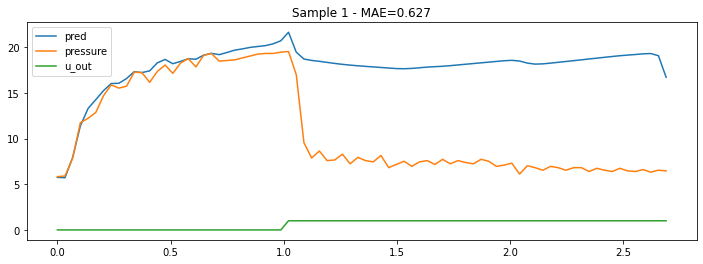

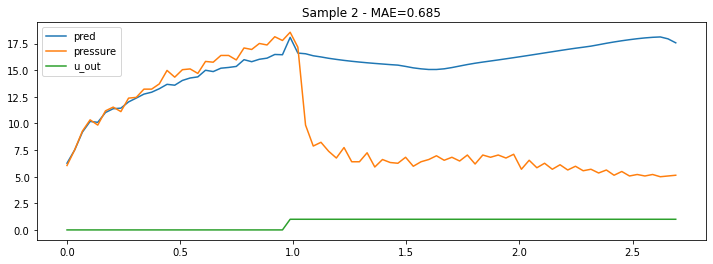

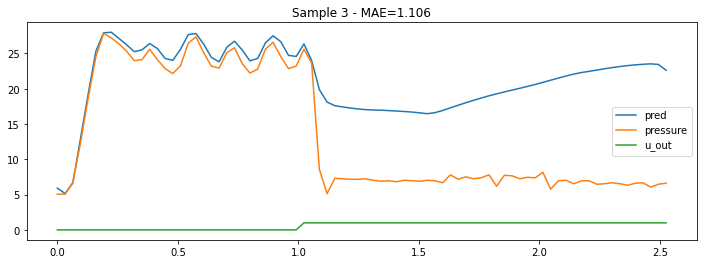

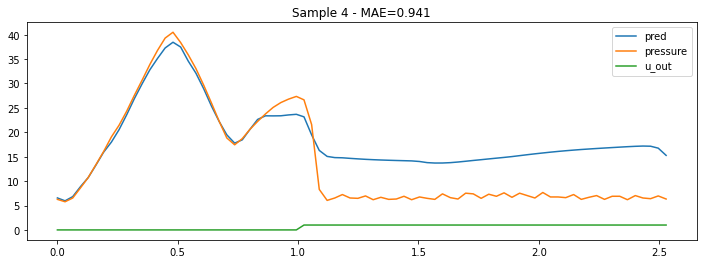

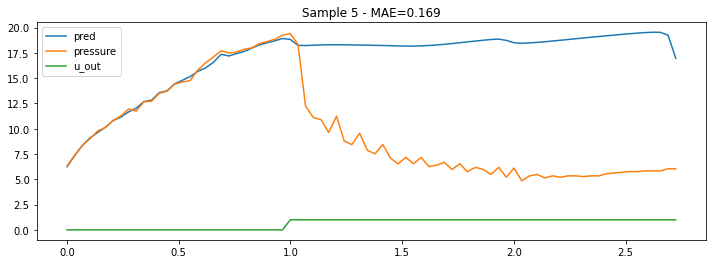

In [18]:
for i in df_train['breath_id'].unique()[:5]:
    plot_prediction(i, df_train)